# Lending Club Case Study Notebook

Problem Statement:Analyse the banking and financial services data (prior history) and derive insights to minimise the risk of losing money while lending to future customers.The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

# General Information
This project aims to address the challenge of loan defaults in the lending industry, specifically for Lending Club, a major online loan marketplace. The focus is on improving loan approval processes by identifying patterns that predict the likelihood of applicants defaulting on their loans.

Business Problem

The primary business problem is the risk of financial loss due to loan defaults. By identifying 'risky' applicants who are likely to default, the project aims to minimize these losses. Accurate evaluation of loan applications is crucial for making informed decisions on whether to approve, reject, or adjust loan terms.

Dataset

The dataset used in this project loan.csv includes historical data on past loan applicants, covering their repayment history and loan outcomes. The key categories of loan outcomes are:

Fully Paid: Loans that have been repaid in full.
Current: Loans that are still being repaid.
Charged-Off: Loans where the applicant has defaulted.

# Technologies used
NumPy: For numerical computations.

Pandas: For data manipulation and analysis.


Matplotlib: For creating visualizations.

Seaborn: For statistical data visualization.

Python: The primary programming language used for this project.

In [1]:
#Loading the Libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Reading the Dataset
df = pd.read_csv("loan.csv")

C:\Users\mathu\AppData\Local\Temp\ipykernel_20776\1778639920.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [3]:

df.head(5)
df.shape


(39717, 111)

# Data Review and Cleansing

In [4]:
df.isnull().sum().sort_values(ascending=False)


verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

#There are many columns having all NULL Values. All of these can be dropped

In [5]:

numrows = len(df.index)


dropcols = df.columns[df.isna().sum()==numrows]

df = df.drop(columns=dropcols,axis=1)


#Get the total number of Rows in the Dataset.
#Use that to see how many columns have all NA and drop them

#Getting the list of columns have all Null Values


#Dropping the Columns identifed above

In [6]:
df.shape


(39717, 57)

In [7]:

df.isna().sum().sort_values(ascending=False).head(4)


next_pymnt_d              38577
mths_since_last_record    36931
mths_since_last_delinq    25682
desc                      12942
dtype: int64

#dropping the below columns also as they have high NA values

#There are four columns that have very number of NA. They would no help for our analysis given the count of NA

In [8]:
dropcols=df.isna().sum().sort_values(ascending=False).head(4).index
df = df.drop(columns=dropcols,axis=1)

In [9]:
df.shape


(39717, 53)

#Number of columns are now reduced to 53

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)


emp_title                     0.061913
emp_length                    0.027066
pub_rec_bankruptcies          0.017549
last_pymnt_d                  0.001788
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
revol_util                    0.001259
tax_liens                     0.000982
title                         0.000277
last_credit_pull_d            0.000050
total_rec_prncp               0.000000
out_prncp                     0.000000
initial_list_status           0.000000
out_prncp_inv                 0.000000
total_acc                     0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
collection_recovery_fee       0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
pub_rec                       0.000000
last_pymnt_amnt               0.000000
policy_code                   0.000000
application_type              0.000000
acc_now_delinq           

reviewing the NA Percentage for the remaining columns against the lenght of the dataset

Now moving to revew the content of columns to see if the values in them would help in our analysis. 


In [11]:
df.nunique().sort_values(ascending=False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d              106
last_pymnt_d                

# Since we are looking at new customers,there is no point of having historical data in the dataset (as that data will be blank for new customers).

Reading through the info dataset below are the columns that can be deleted


 collection_recovery_fee  post charge off collection fee
 delinq_2yrs  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
 
  earliest_cr_line  The month the borrower's earliest reported credit line was opened
  
  inq_last_6mths  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
  
  last_credit_pull_d  The most recent month LC pulled credit for this loan
  
  last_pymnt_amnt  Last total payment amount received
  
  last_pymnt_d  Last month payment was received
  
  out_prncp  Remaining outstanding principal for total amount funded
  
  out_prncp_inv  Remaining outstanding principal for portion of total amount funded by investors
  
  recoveries  post charge off gross recovery
  
  revol_bal  Total credit revolving balance
  
  revol_util  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
  
  total_acc  The total number of credit lines currently in the borrower's credit file
  
  total_pymnt  Payments received to date for total amount funded
  
  total_pymnt_inv  Payments received to date for portion of total amount funded by investors
  
  total_rec_int  Interest received to date
  
  total_rec_late_fee  Late fees received to date
  
  total_rec_prncp  Principal received to date
  

In [12]:

df = df.drop(['collection_recovery_fee',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'last_credit_pull_d',
'last_pymnt_amnt',
'last_pymnt_d',
'out_prncp',
'out_prncp_inv',
'recoveries',
'revol_bal',
'revol_util',
'total_acc',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp'],axis=1)

In [13]:
df.shape

(39717, 35)

In [14]:
df.nunique().sort_values(ascending=False)

id                            39717
url                           39717
member_id                     39717
emp_title                     28820
title                         19615
installment                   15383
funded_amnt_inv                8205
annual_inc                     5318
dti                            2868
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
int_rate                        371
issue_d                          55
addr_state                       50
open_acc                         40
sub_grade                        35
purpose                          14
emp_length                       11
grade                             7
pub_rec                           5
home_ownership                    5
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
term                              2
acc_now_delinq                    1
delinq_amnt                 

In [15]:
df[['id','url','member_id','emp_title']]
# All the above columns can be deleted as they hold no significance for our analysis


,id,url,member_id,emp_title
0,1077501,https://lendingclub.com/browse/loanDetail.acti...,1296599,NaN
1,1077430,https://lendingclub.com/browse/loanDetail.acti...,1314167,Ryder
2,1077175,https://lendingclub.com/browse/loanDetail.acti...,1313524,NaN
3,1076863,https://lendingclub.com/browse/loanDetail.acti...,1277178,AIR RESOURCES BOARD
4,1075358,https://lendingclub.com/browse/loanDetail.acti...,1311748,University Medical Group
...,...,...,...,...
39712,92187,https://lendingclub.com/browse/loanDetail.acti...,92174,FiSite Research
39713,90665,https://lendingclub.com/browse/loanDetail.acti...,90607,"Squarewave Solutions, Ltd."
39714,90395,https://lendingclub.com/browse/loanDetail.acti...,90390,NaN
39715,90376,https://lendingclub.com/browse/loanDetail.acti...,89243,NaN


In [16]:
df=df.drop(['id','url','member_id','emp_title'],axis=1)

In [17]:
df.shape

(39717, 31)

In [18]:
#dropping all cols that have only one value

dropcols = df.columns[df.nunique()==1]
df = df.drop(dropcols,axis=1)
# There are 9 columns that have the same value across all rows (for the same col). This would not help in analysis and hence dropping

In [19]:
df.shape

(39717, 22)

In [20]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,3,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,bike,309xx,GA,1.00,3,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,2,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,10,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,Personal,972xx,OR,17.94,15,0,0.0


In [21]:
#checking the dataset to see how many NA are still left
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies     697
dtype: int64

In [22]:
#filling the NA with dummy values
df['emp_length'] = df['emp_length'].fillna("NotProvided")


In [23]:
df.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
open_acc                  0
pub_rec                   0
pub_rec_bankruptcies    697
dtype: int64

In [24]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [25]:
#updating the pub_rec_bankruptcies to Zero
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)


In [26]:
#checking the dataset to see how many NA are still left
df.isna().sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
title                   11
zip_code                 0
addr_state               0
dti                      0
open_acc                 0
pub_rec                  0
pub_rec_bankruptcies     0
dtype: int64

In [27]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,open_acc,pub_rec,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,3,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,bike,309xx,GA,1.00,3,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,2,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,10,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,Personal,972xx,OR,17.94,15,0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [29]:
# removing "months" in term and converting to int
df['term'] = df['term'].apply(lambda x: x.replace('months',''))
df['term'] = df['term'].astype('int')

# removing "%" in int_rate and converting to int
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace('%',''))
df['int_rate'] = df['int_rate'].astype('float')

In [30]:
df['issue_d'].value_counts()
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_year'] = pd.to_datetime(df['issue_d'],format='%b-%y').dt.year
df['issue_month'] = pd.to_datetime(df['issue_d'],format='%b-%y').dt.month

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int32         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

In [32]:
df.loc[1,:]

loan_amnt                              2500
funded_amnt                            2500
funded_amnt_inv                      2500.0
term                                     60
int_rate                              15.27
installment                           59.83
grade                                     C
sub_grade                                C4
emp_length                         < 1 year
home_ownership                         RENT
annual_inc                          30000.0
verification_status         Source Verified
issue_d                 2011-12-01 00:00:00
loan_status                     Charged Off
purpose                                 car
title                                  bike
zip_code                              309xx
addr_state                               GA
dti                                     1.0
open_acc                                  3
pub_rec                                   0
pub_rec_bankruptcies                    0.0
issue_year                      

In [33]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


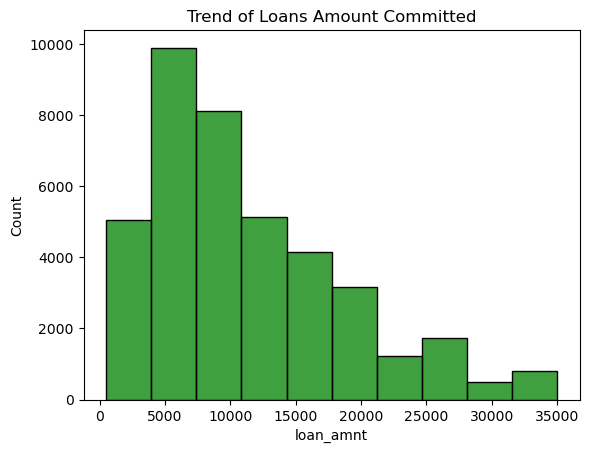

In [34]:
sns.histplot(df['loan_amnt'],bins=10,color='green')
plt.title("Trend of Loans Amount Committed")
plt.show()

* Most of the Loan Amount is given in the rage $5000- $10000

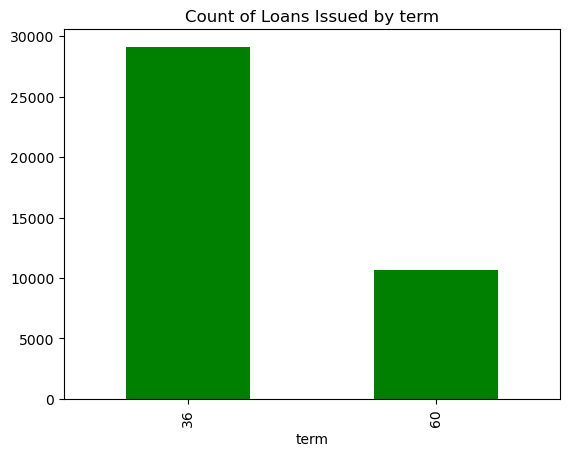

In [35]:
df['term'].value_counts().plot.bar(color='green')
plt.title("Count of Loans Issued by term")
plt.show()

* Most of the Loans were given on a duration of 36 Months

C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


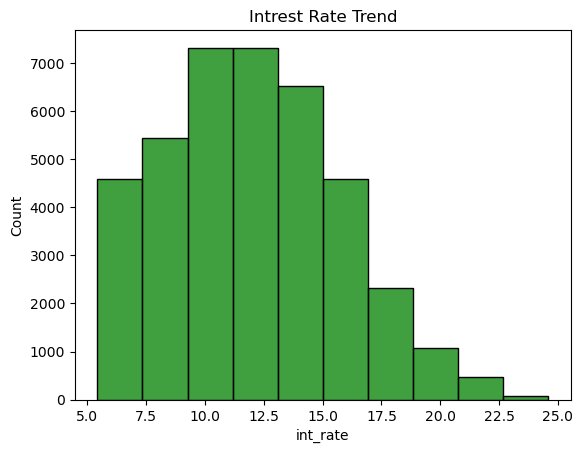

In [36]:
sns.histplot(df['int_rate'],bins=10,color='green')
plt.title("Intrest Rate Trend")
plt.show()

^ Most of the loans were issued in the intrest range of 10 to 15%

C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


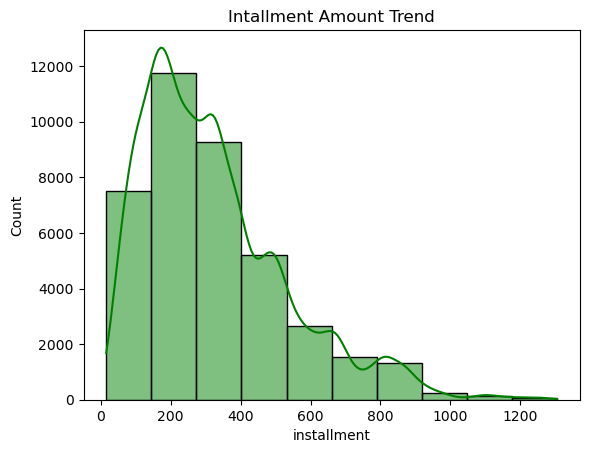

In [37]:
sns.histplot(df['installment'],bins=10,color='green',kde=True)
plt.title("Intallment Amount Trend")
plt.show()

The above finding is inline with the loan_amnt trend. Most of the installments are in the range 200-$400

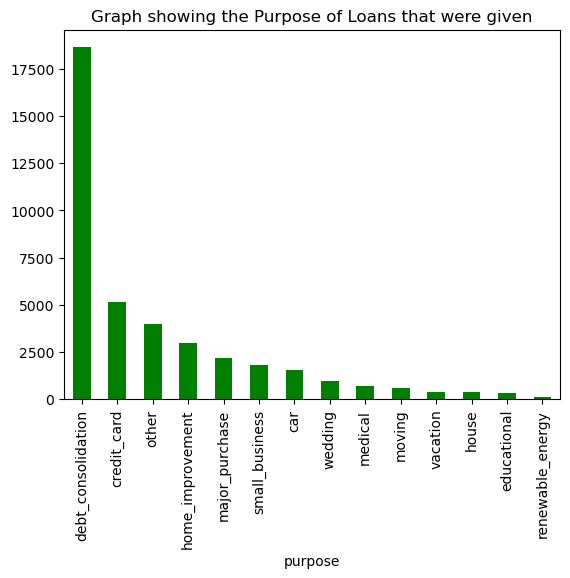

In [38]:
df['purpose'].value_counts().plot.bar(color='green')
plt.title("Graph showing the Purpose of Loans that were given")
plt.show()

* Most of the Loans were given against debt_consolidation

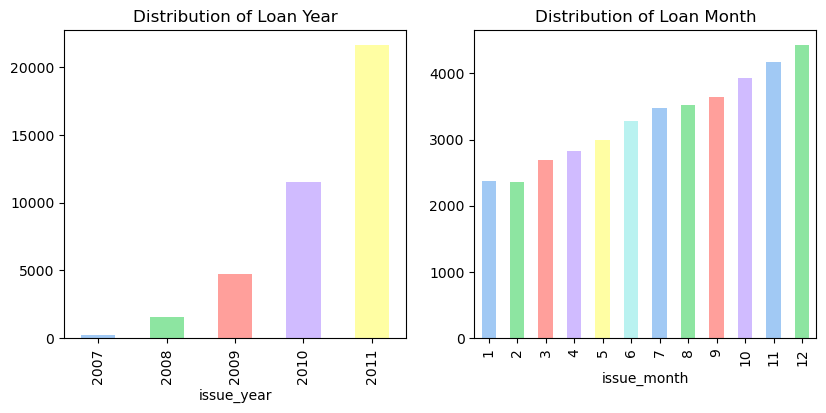

In [39]:

plt.figure(figsize=(15, 4))

# Loan Year
plt.subplot(131)
df['issue_year'].value_counts().sort_index().plot(kind='bar',color=sns.color_palette("pastel6",10))
plt.title('Distribution of Loan Year')

# Loan Year
plt.subplot(132)
df['issue_month'].value_counts().sort_index().plot(kind='bar',color=sns.color_palette("pastel6",10))
plt.title('Distribution of Loan Month')
plt.show()


Most of the Loans were given in 2011. Also we see the business started in 2007 (based on data) and every year the count of loans given is increasing

C:\Users\mathu\AppData\Local\Temp\ipykernel_20776\3905195354.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="loan_status",y="annual_inc",data=df,palette="pastel")
C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathu\AppData\Local\Temp\ipykernel_20776\3905195354.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="loan_status",y="loan_amnt",data=df,palette="pastel")
C:\Users\mathu\anaconda3\Lib\site-packages\se

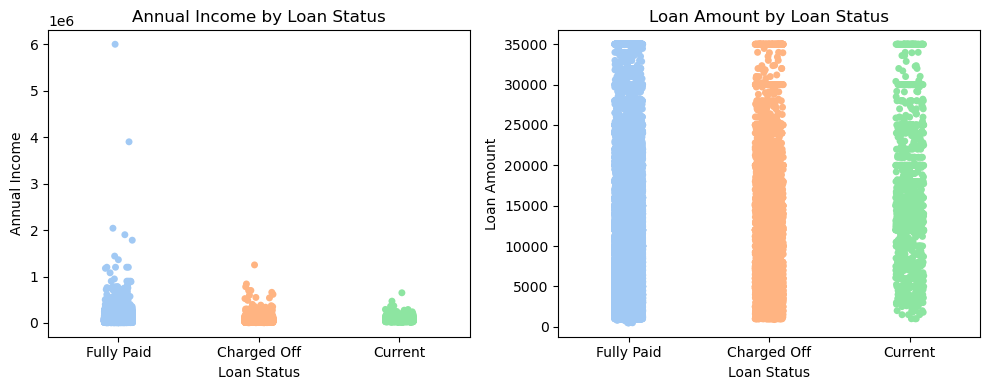

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.stripplot(x="loan_status",y="annual_inc",data=df,palette="pastel")
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.title("Annual Income by Loan Status")
plt.subplot(122)
sns.stripplot(x="loan_status",y="loan_amnt",data=df,palette="pastel")
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.title("Loan Amount by Loan Status")
plt.tight_layout()
plt.show()

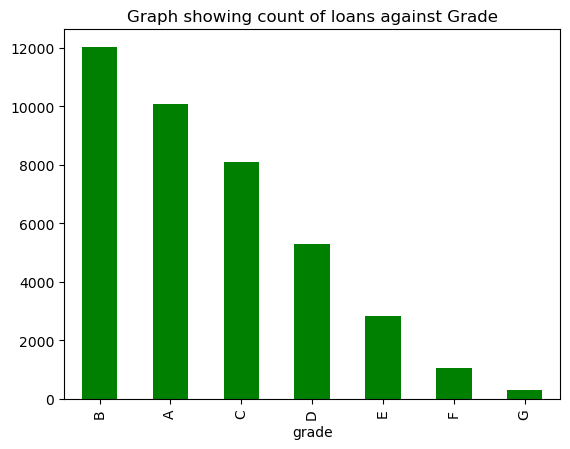

In [41]:
df['grade'].value_counts().plot.bar(color='green')
plt.title("Graph showing count of loans against Grade")
plt.show()

Most of the Loans were given to B, A, C group customers

C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

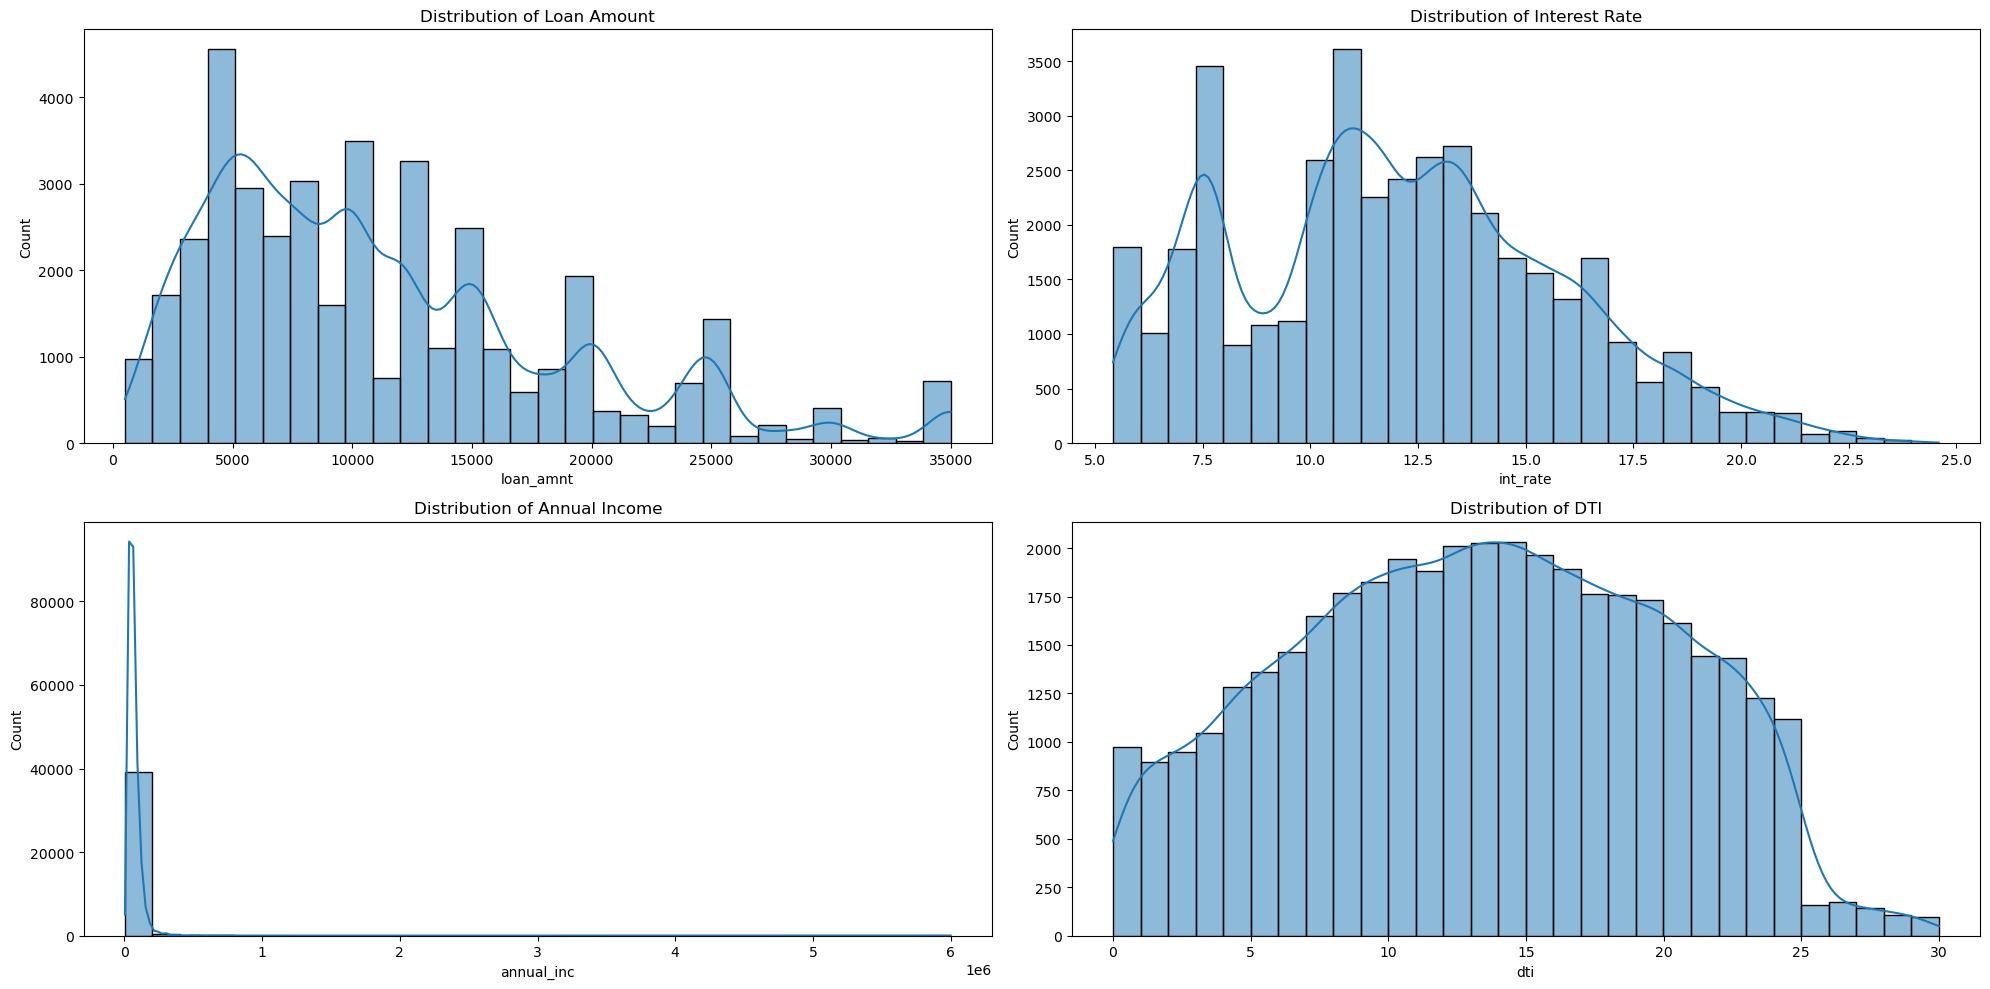

In [42]:
plt.figure(figsize=(20, 10))

# Loan Amount
plt.subplot(221)
sns.histplot(data=df,x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of Loan Amount')

# Interest Rate
plt.subplot(222)
sns.histplot(data=df,x='int_rate', bins=30, kde=True)
plt.title('Distribution of Interest Rate')

# Annual Income
plt.subplot(223)
sns.histplot(data=df,x='annual_inc', bins=30, kde=True)
plt.title('Distribution of Annual Income')

# Debt-to-Income Ratio
plt.subplot(224)
sns.histplot(data=df,x='dti', bins=30, kde=True)
plt.title('Distribution of DTI')

plt.tight_layout()
plt.show()

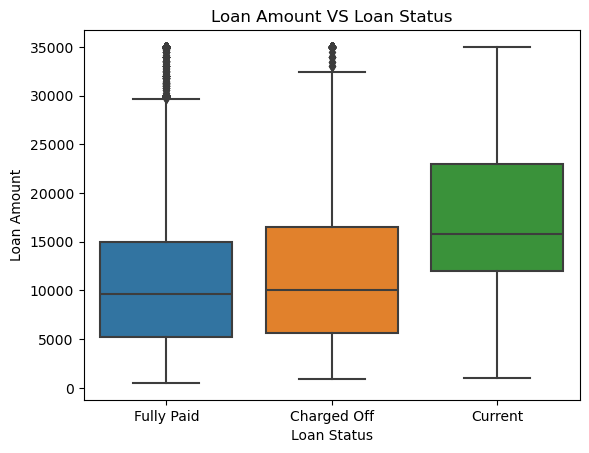

In [43]:
sns.boxplot(data=df,y='loan_amnt',x='loan_status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.title("Loan Amount VS Loan Status")
plt.show()

Higher the loan amoint, higher the risk of beibg charged off

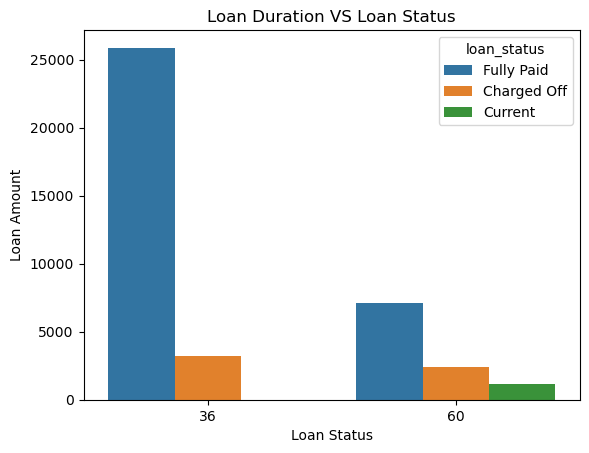

In [44]:
sns.countplot(x=df['term'],hue=df['loan_status'])
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.title("Loan Duration VS Loan Status")

plt.show()

** Customers with 36 Months are better at Paying off compared to 60 Months

In [45]:
df[['term','loan_status']].value_counts()

term  loan_status
36    Fully Paid     25869
60    Fully Paid      7081
36    Charged Off     3227
60    Charged Off     2400
      Current         1140
Name: count, dtype: int64

Baed on the above data and graph we can derive that 36 Months Loans have better chance of being Paid Back, Compared to 60 Months

C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


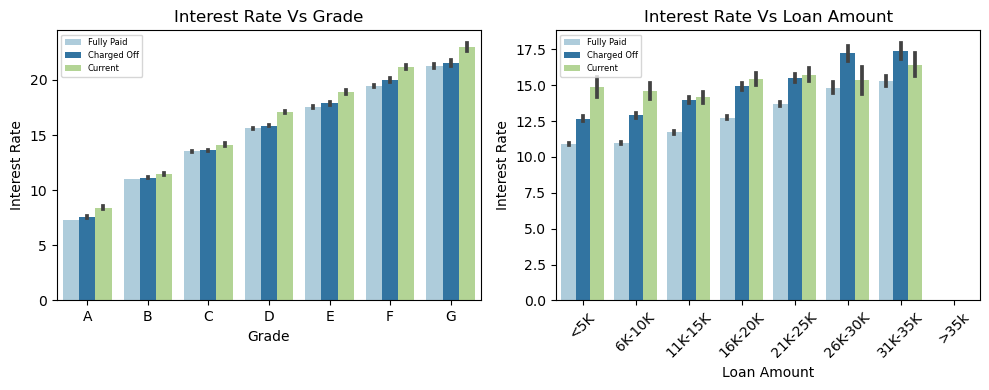

In [46]:
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000,25000,30000,35000, float('Inf')], labels=['<5K', '6K-10K', '11K-15K', '16K-20K', '21K-25K','26K-30K','31K-35K','>35k'])


plt.figure(figsize=(10,4))
plt.subplot(121)
sns.barplot(x="grade",y="int_rate",data=df,order=['A','B','C','D','E','F','G'],hue='loan_status',palette="Paired")
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
plt.legend(loc='upper left',fontsize=6,title='')
plt.title("Interest Rate Vs Grade")
plt.subplot(122)
sns.barplot(data=df,y='int_rate',x='loan_amnt_range',hue='loan_status',palette="Paired")
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount')
plt.legend(loc='upper left',fontsize=6,title='')
plt.title("Interest Rate Vs Loan Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\mathu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


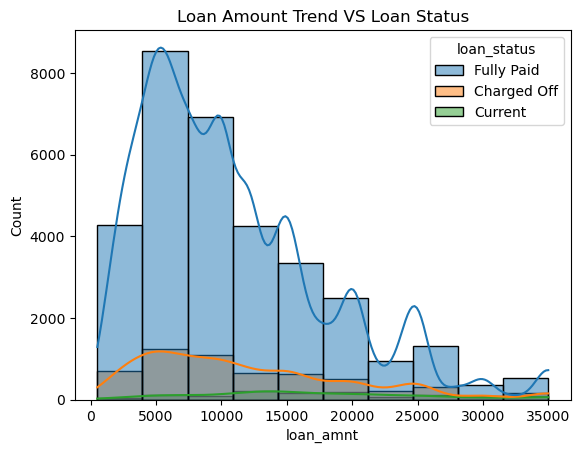

In [47]:
sns.histplot(data=df,x='loan_amnt',bins=10,color='green',hue=df['loan_status'],kde=True)
plt.title("Loan Amount Trend VS Loan Status")
plt.show()

High Loan Amounts  have higher probability of tetting Fullpaid. Loan Amounts in the range 5000 to $10000 have high risk of getting into ChargedOff State

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int32         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     

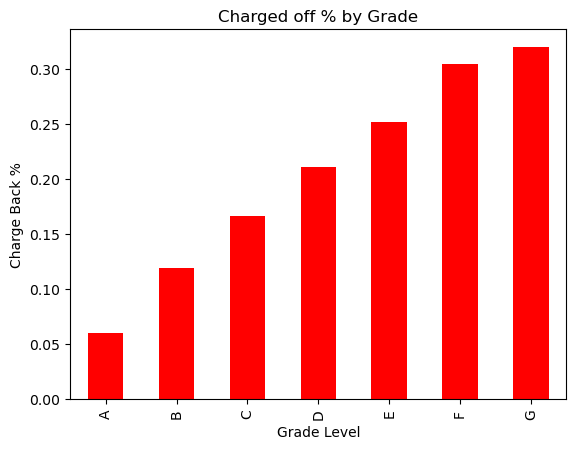

In [49]:
gradedetail = pd.pivot_table(data=df,index='loan_status',columns='grade',aggfunc='count',values='loan_amnt',fill_value=0)
    
for column in gradedetail:
    gradedetail[column] = gradedetail[column].astype(float)
 
gradedetail.loc['Charged Off'] = gradedetail.loc['Charged Off'] / (gradedetail.loc['Charged Off'] + gradedetail.loc['Current'] + gradedetail.loc['Fully Paid'])

gradedetail.loc['Charged Off'].plot.bar(color='red')
plt.title("Charged off % by Grade")
plt.xlabel("Grade Level")
plt.ylabel("Charge Back %")
plt.show()

Grade D and above have high chance of getting Charged Off (Grade F and G have ~30% Chance of getting charged off)

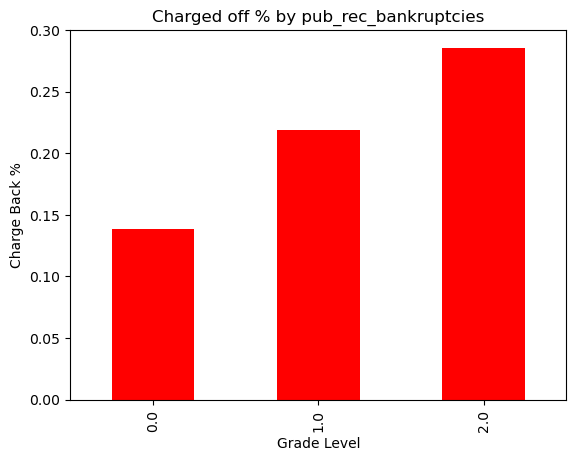

In [50]:
pubrecbankruptcies = pd.pivot_table(data=df,index='loan_status',columns='pub_rec_bankruptcies',aggfunc='count',values='loan_amnt',fill_value=0)
    
for column in pubrecbankruptcies:
    pubrecbankruptcies[column] = pubrecbankruptcies[column].astype(float)
 
pubrecbankruptcies.loc['Charged Off'] = pubrecbankruptcies.loc['Charged Off'] / (pubrecbankruptcies.loc['Charged Off'] + pubrecbankruptcies.loc['Current'] + pubrecbankruptcies.loc['Fully Paid'])

pubrecbankruptcies.loc['Charged Off'].plot.bar(color='red')
plt.title("Charged off % by pub_rec_bankruptcies")
plt.xlabel("Grade Level")
plt.ylabel("Charge Back %")
plt.show()

Cusotmers with more than 1 pub_rec_bankruptcies are likely to get their loan charged off (~30% Chance)

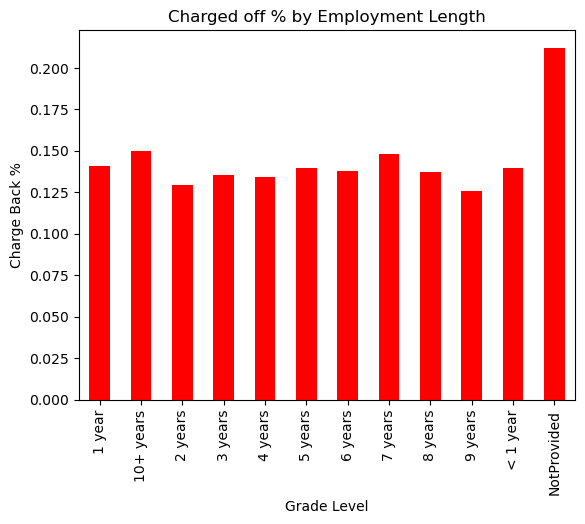

In [51]:
emp_length = pd.pivot_table(data=df,index='loan_status',columns='emp_length',aggfunc='count',values='loan_amnt',fill_value=0)
    
for column in emp_length:
    emp_length[column] = emp_length[column].astype(float)
 
emp_length.loc['Charged Off'] = emp_length.loc['Charged Off'] / (emp_length.loc['Charged Off'] + emp_length.loc['Current'] + emp_length.loc['Fully Paid'])

emp_length.loc['Charged Off'].plot.bar(color='red')
plt.title("Charged off % by Employment Length")
plt.xlabel("Grade Level")
plt.ylabel("Charge Back %")
plt.show()

Customers who are not providing their Employment Length have highest probability of getting their loan Charged off (~25% Chance)

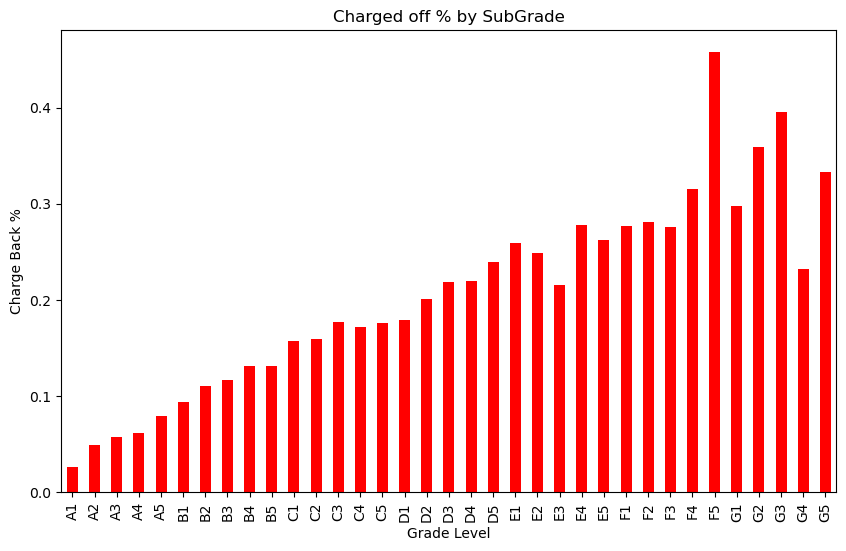

In [52]:
sub_grade = pd.pivot_table(data=df,index='loan_status',columns='sub_grade',aggfunc='count',values='loan_amnt',fill_value=0)
    
for column in sub_grade:
    sub_grade[column] = sub_grade[column].astype(float)
 
sub_grade.loc['Charged Off'] = sub_grade.loc['Charged Off'] / (sub_grade.loc['Charged Off'] + sub_grade.loc['Current'] + sub_grade.loc['Fully Paid'])
plt.figure(figsize=(10,6))
sub_grade.loc['Charged Off'].plot.bar(color='red')
plt.title("Charged off % by SubGrade")
plt.xlabel("Grade Level")
plt.ylabel("Charge Back %")

plt.show()

Grade F4 and G4 have ~40% Chance of getting charged off

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int32         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  object        
 8   emp_length            39717 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  datetime64[ns]
 13  loan_status     